<a href="https://colab.research.google.com/github/RAHULKISHORE93/binary-classification-of-machine-failures/blob/main/binary_classification_of_machine_failures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_csv("/content/train.csv")

In [90]:
'''from google.colab import drive
drive.mount('/content/train.csv')'''

"from google.colab import drive\ndrive.mount('/content/train.csv')"

In [91]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [92]:
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [93]:
df.shape

(136429, 14)

In [94]:
df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [95]:
df.dtypes

id                           int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [96]:
# Converting all uppercases in to lowercases
df.columns=df.columns.str.lower()
cat_cols = [col for col in df.columns if df[col].dtypes=='object']
for columns in cat_cols:
       df[columns] = df[columns].str.lower()

In [97]:
df.columns

Index(['id', 'product id', 'type', 'air temperature [k]',
       'process temperature [k]', 'rotational speed [rpm]', 'torque [nm]',
       'tool wear [min]', 'machine failure', 'twf', 'hdf', 'pwf', 'osf',
       'rnf'],
      dtype='object')

In [98]:
#For finding nulls in each columns
df.isnull().sum()

id                         0
product id                 0
type                       0
air temperature [k]        0
process temperature [k]    0
rotational speed [rpm]     0
torque [nm]                0
tool wear [min]            0
machine failure            0
twf                        0
hdf                        0
pwf                        0
osf                        0
rnf                        0
dtype: int64

 #  **Checking value counts in each particular column**

In [99]:
df['product id'].value_counts

<bound method IndexOpsMixin.value_counts of 0         l50096
1         m20343
2         l49454
3         l53355
4         m24050
           ...  
136424    m22284
136425    h38017
136426    l54690
136427    l53876
136428    l47937
Name: product id, Length: 136429, dtype: object>

In [100]:
df["product id"].nunique()

9976

In [101]:
df['product id'].unique

<bound method Series.unique of 0         l50096
1         m20343
2         l49454
3         l53355
4         m24050
           ...  
136424    m22284
136425    h38017
136426    l54690
136427    l53876
136428    l47937
Name: product id, Length: 136429, dtype: object>

In [102]:
df['type'].value_counts

<bound method IndexOpsMixin.value_counts of 0         l
1         m
2         l
3         l
4         m
         ..
136424    m
136425    h
136426    l
136427    l
136428    l
Name: type, Length: 136429, dtype: object>

In [103]:
df['type'].nunique()

3

In [104]:
df['type'].unique

<bound method Series.unique of 0         l
1         m
2         l
3         l
4         m
         ..
136424    m
136425    h
136426    l
136427    l
136428    l
Name: type, Length: 136429, dtype: object>

# Dropping Duplicates from dataframe

In [105]:
df=df.drop_duplicates()

In [106]:
df.shape

(136429, 14)

# Data Visualization

## 1)Distribution of Categorical Data ##

### i)Distribution of Categorical Data ###

In [107]:
df


,id,product id,type,air temperature [k],process temperature [k],rotational speed [rpm],torque [nm],tool wear [min],machine failure,twf,hdf,pwf,osf,rnf
0,0,l50096,l,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,m20343,m,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,l49454,l,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,l53355,l,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,m24050,m,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,m22284,m,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,h38017,h,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,l54690,l,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,l53876,l,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


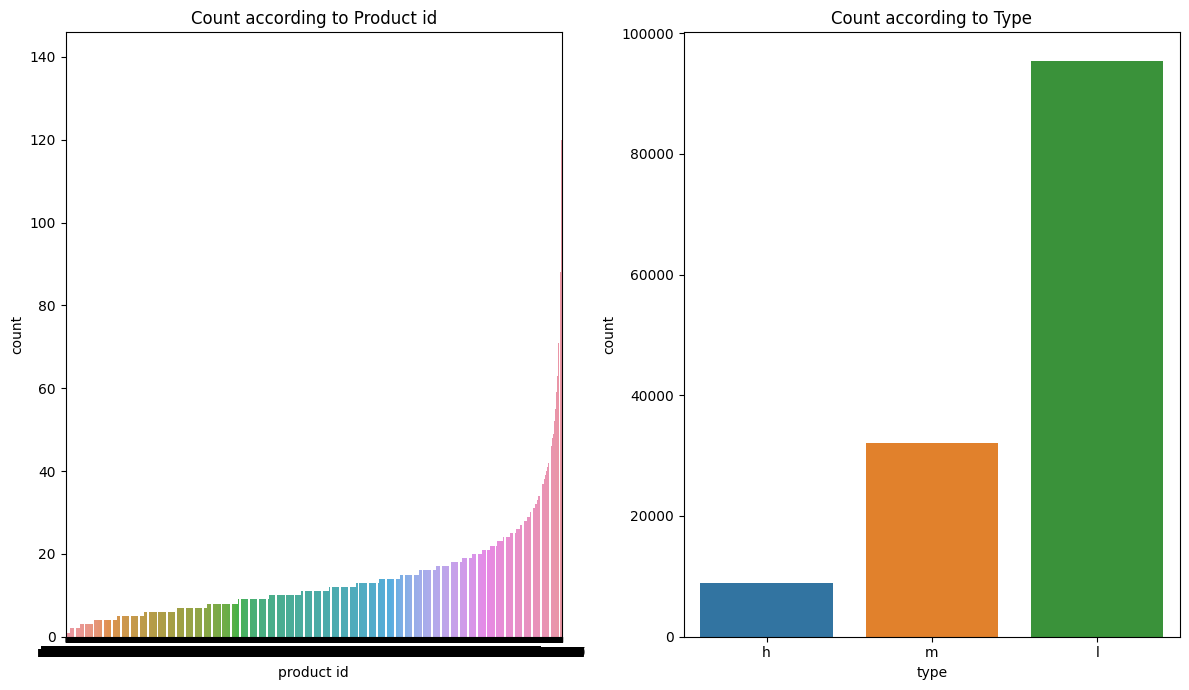

In [108]:
plt.figure(figsize=(12,7))

plt.subplot(121)
sns.countplot(x="product id",data = df,order = df["product id"].value_counts(ascending=True).index)
plt.title("Count according to Product id")

plt.subplot(122)
sns.countplot(x="type",data=df,order=df["type"].value_counts(ascending=True).index)
plt.title("Count according to Type")

plt.tight_layout()

### ii)Distribution of Continuous Data ###

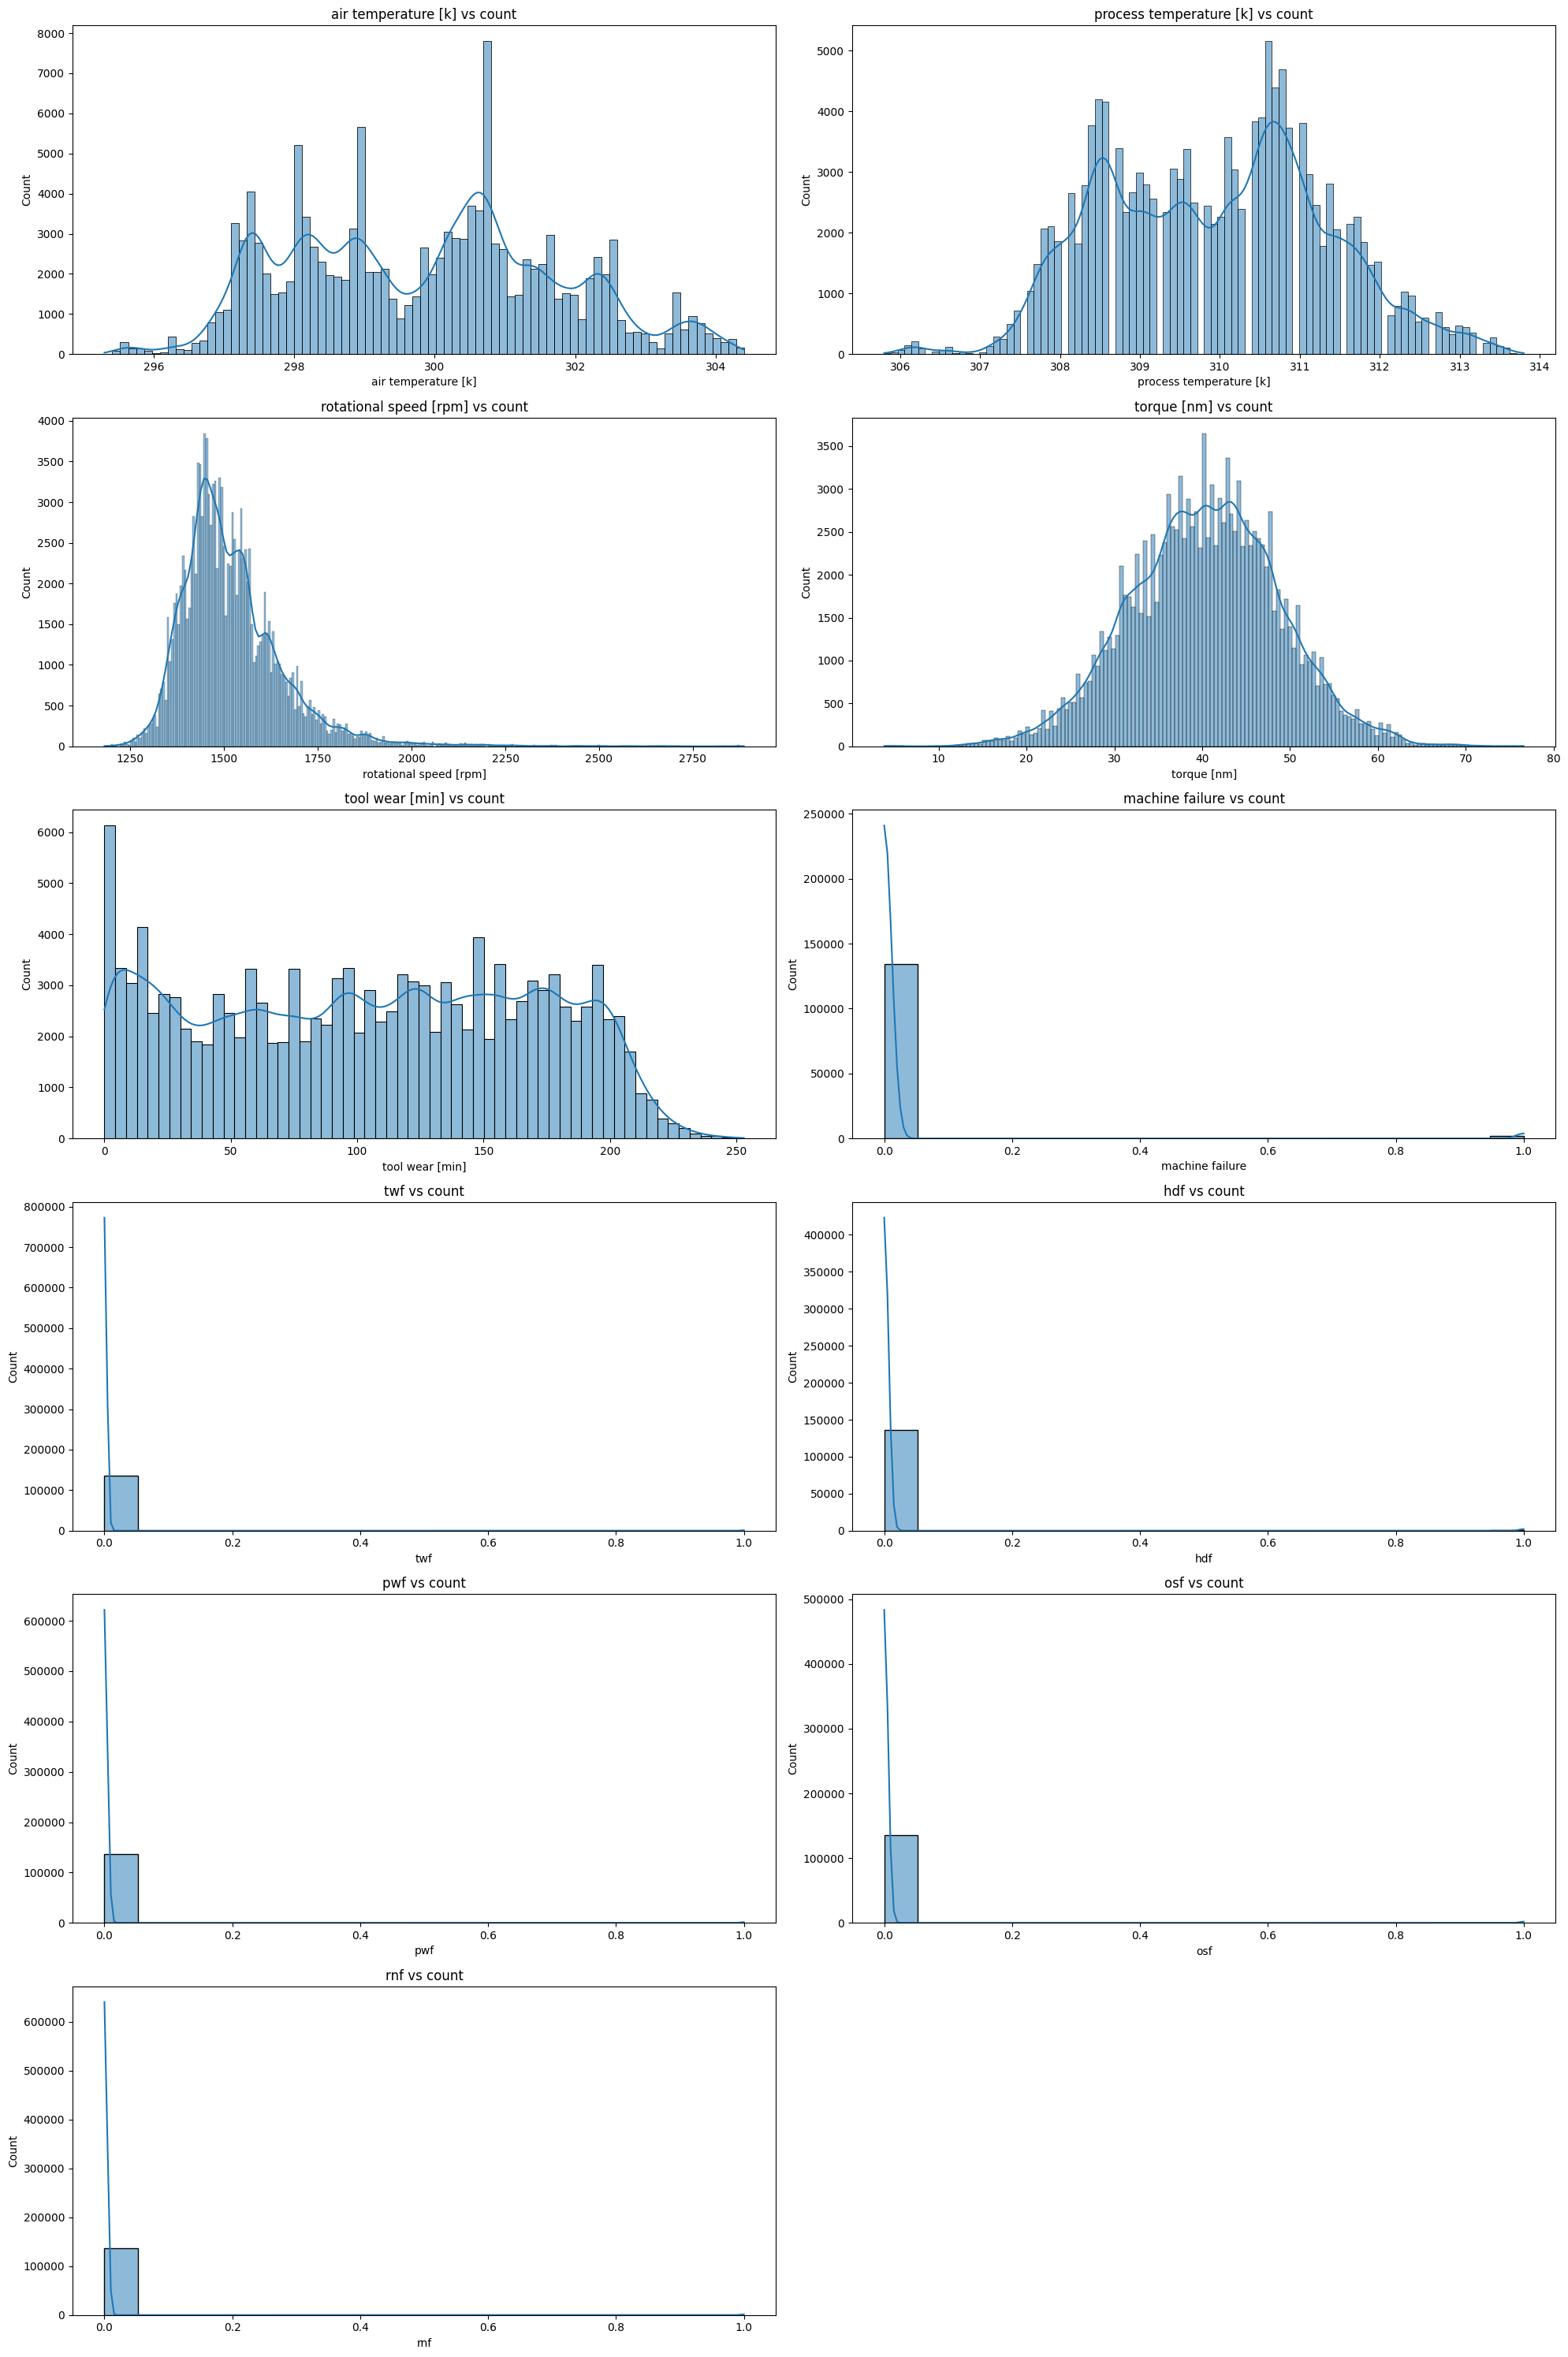

In [109]:
plt.figure(figsize=(20,30))

plt.subplot(621)
sns.histplot(x="air temperature [k]",data=df,kde=True)
plt.title("air temperature [k] vs count")

plt.subplot(622)
sns.histplot(x="process temperature [k]",data=df,kde=True)
plt.title("process temperature [k] vs count")

plt.subplot(623)
sns.histplot(x="rotational speed [rpm]",data=df,kde=True)
plt.title("rotational speed [rpm] vs count")

plt.subplot(624)
sns.histplot(x="torque [nm]",data=df,kde=True)
plt.title("torque [nm] vs count")

plt.subplot(625)
sns.histplot(x="tool wear [min]",data=df,kde=True)
plt.title("tool wear [min] vs count")

plt.subplot(626)
sns.histplot(x="machine failure",data=df,kde=True)
plt.title("machine failure vs count")

plt.subplot(627)
sns.histplot(x="twf",data=df,kde=True)
plt.title("twf vs count")

plt.subplot(628)
sns.histplot(x="hdf",data=df,kde=True)
plt.title("hdf vs count")

plt.subplot(629)
sns.histplot(x="pwf",data=df,kde=True)
plt.title("pwf vs count")

plt.subplot(6,2,10)
sns.histplot(x="osf",data=df,kde=True)
plt.title("osf vs count")

plt.subplot(6,2,11)
sns.histplot(x="rnf",data=df,kde=True)
plt.title("rnf vs count")


plt.tight_layout()

## **2)Feature VS The Target Plot**

### **i) Continuous feature vs Continuos Target**

In [110]:
df

,id,product id,type,air temperature [k],process temperature [k],rotational speed [rpm],torque [nm],tool wear [min],machine failure,twf,hdf,pwf,osf,rnf
0,0,l50096,l,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,m20343,m,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,l49454,l,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,l53355,l,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,m24050,m,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,m22284,m,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,h38017,h,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,l54690,l,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,l53876,l,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


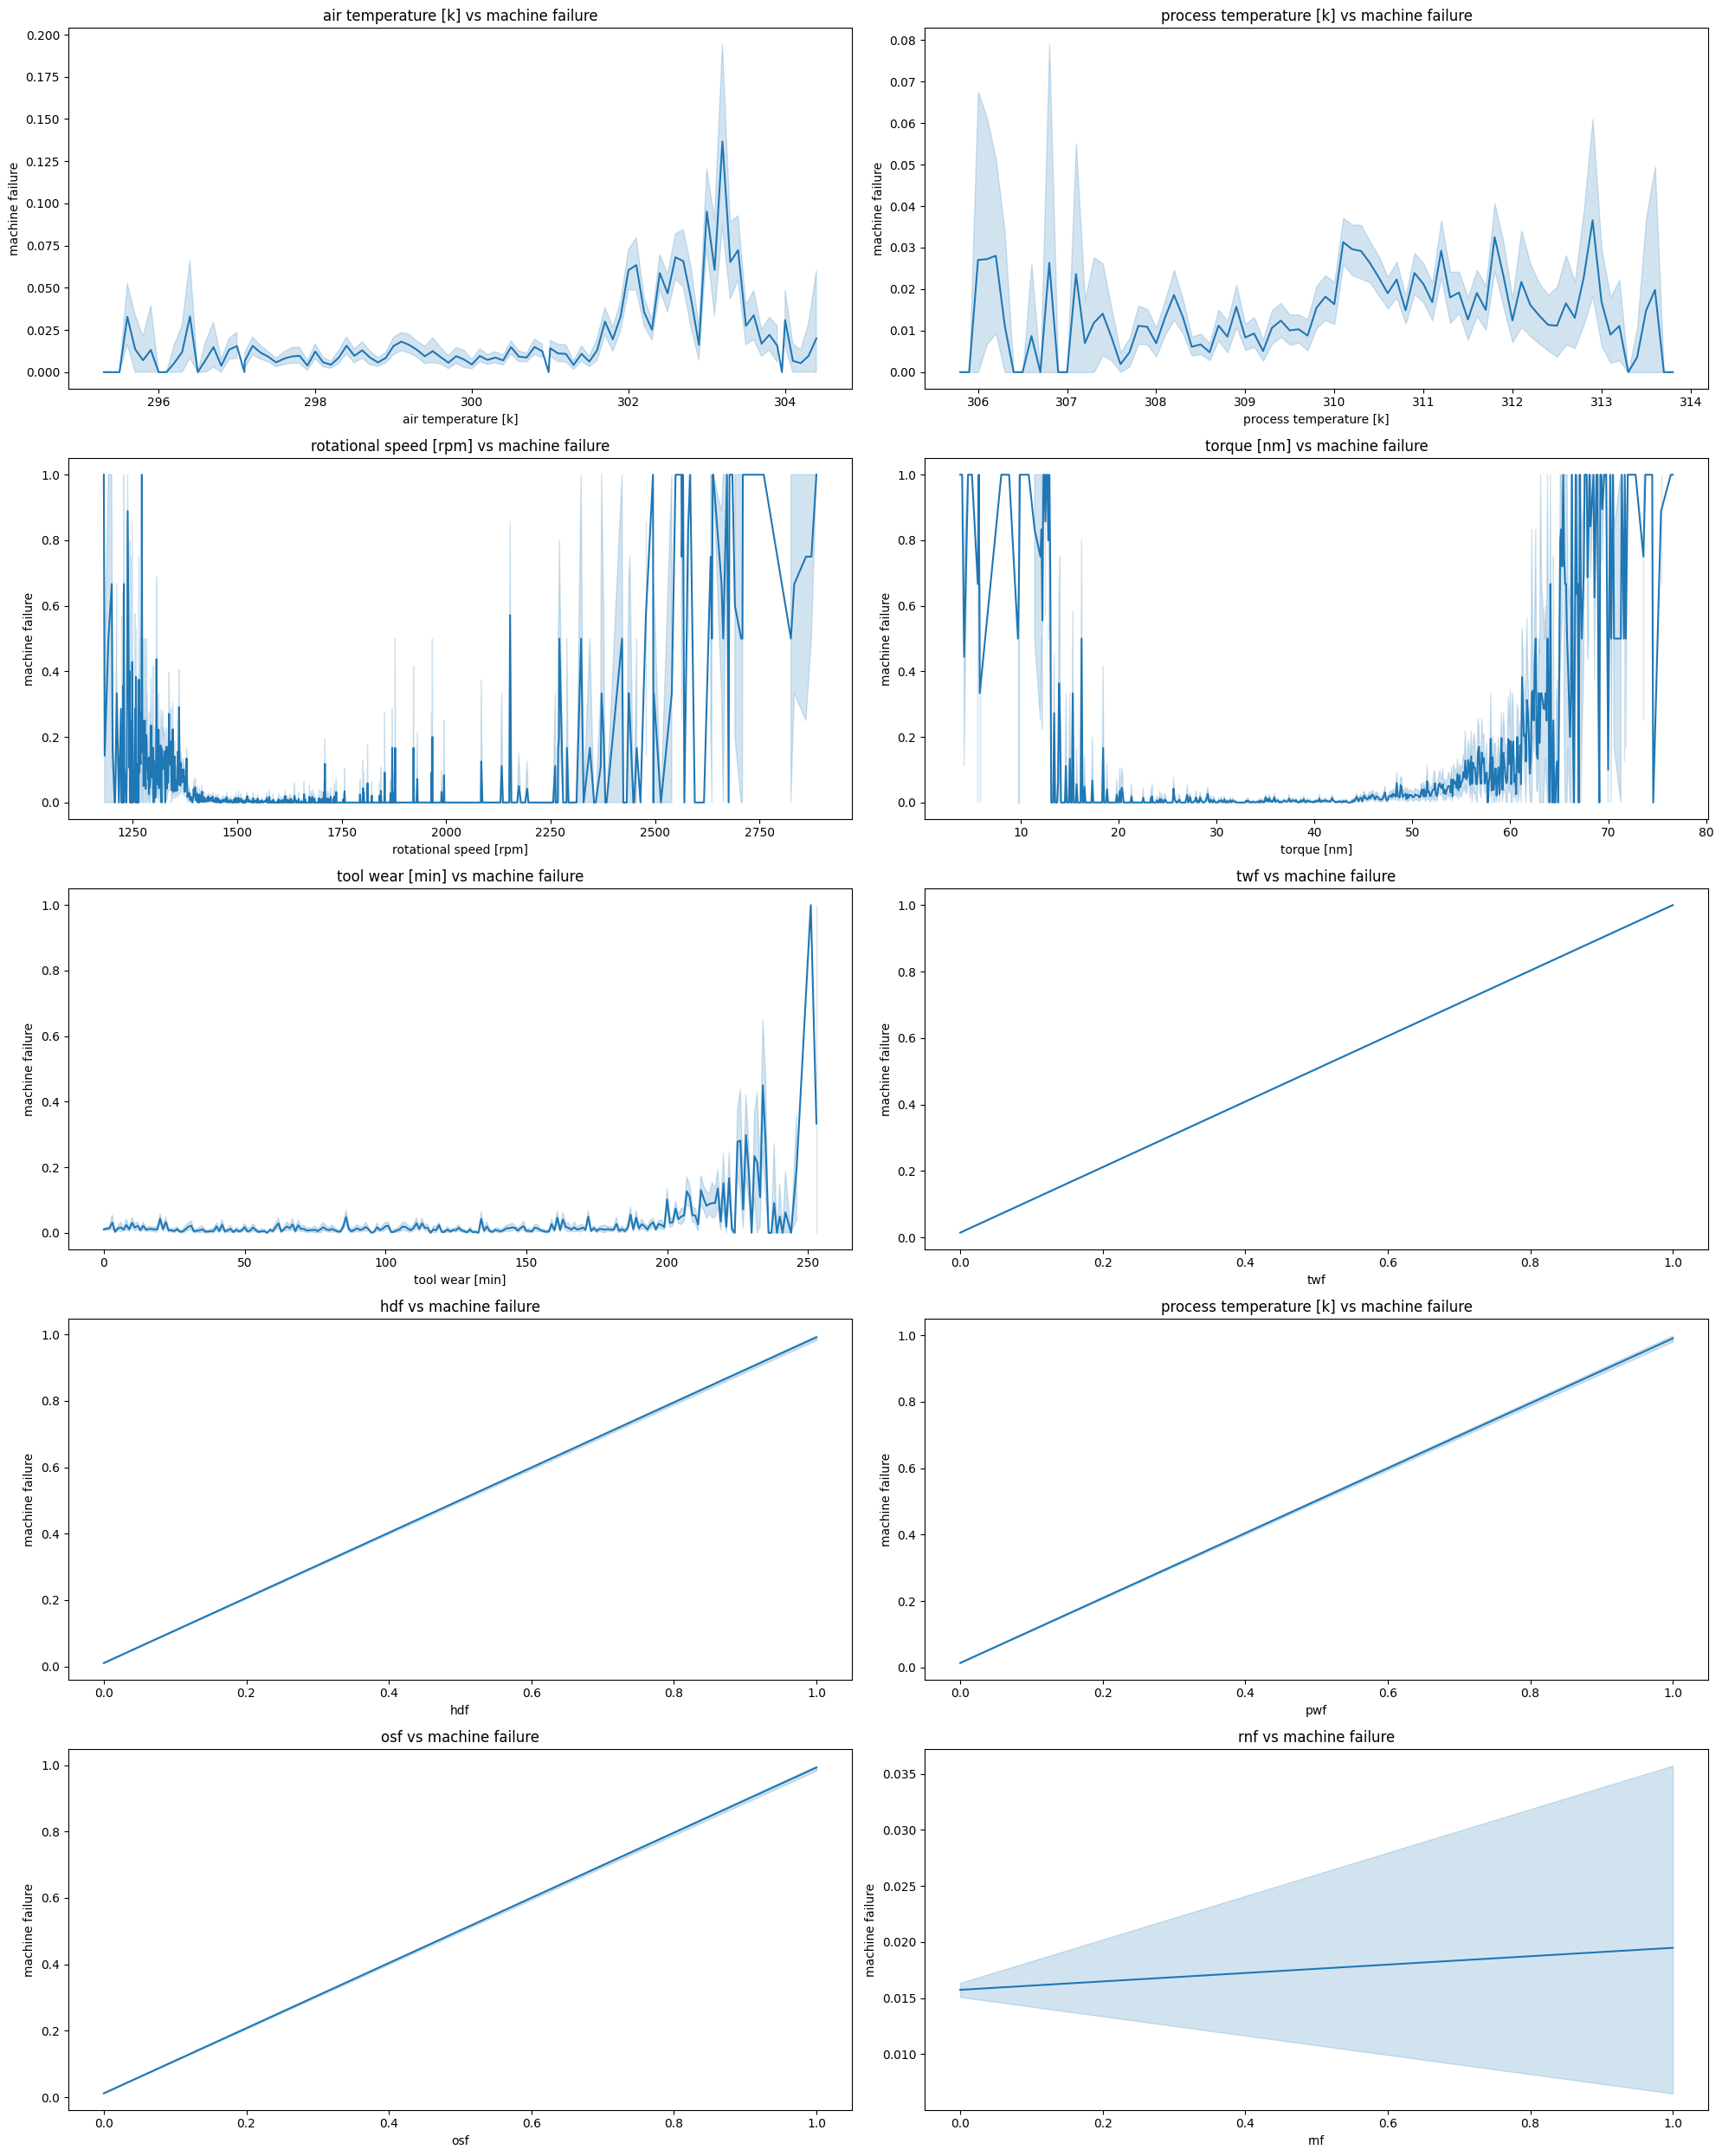

In [111]:
plt.figure(figsize=(20,25))

plt.subplot(521)
sns.lineplot(x="air temperature [k]",y="machine failure",data=df)
plt.title('air temperature [k] vs machine failure')

plt.subplot(522)
sns.lineplot(x="process temperature [k]",y="machine failure",data=df)
plt.title('process temperature [k] vs machine failure')

plt.subplot(523)
sns.lineplot(x="rotational speed [rpm]",y="machine failure",data=df)
plt.title('rotational speed [rpm] vs machine failure')

plt.subplot(524)
sns.lineplot(x="torque [nm]",y="machine failure",data=df)
plt.title('torque [nm] vs machine failure')

plt.subplot(525)
sns.lineplot(x="tool wear [min]",y="machine failure",data=df)
plt.title('tool wear [min] vs machine failure')

plt.subplot(526)
sns.lineplot(x="twf",y="machine failure",data=df)
plt.title('twf vs machine failure')

plt.subplot(527)
sns.lineplot(x="hdf",y="machine failure",data=df)
plt.title('hdf vs machine failure')

plt.subplot(528)
sns.lineplot(x="pwf",y="machine failure",data=df)
plt.title('process temperature [k] vs machine failure')

plt.subplot(529)
sns.lineplot(x="osf",y="machine failure",data=df)
plt.title('osf vs machine failure')

plt.subplot(5,2,10)
sns.lineplot(x="rnf",y="machine failure",data=df)
plt.title('rnf vs machine failure')

plt.tight_layout()

In [112]:
df = pd.get_dummies(df,columns= ["type"])


In [113]:
df.head

<bound method NDFrame.head of             id product id  air temperature [k]  process temperature [k]  \
0            0     l50096                300.6                    309.6   
1            1     m20343                302.6                    312.1   
2            2     l49454                299.3                    308.5   
3            3     l53355                301.0                    310.9   
4            4     m24050                298.0                    309.0   
...        ...        ...                  ...                      ...   
136424  136424     m22284                300.1                    311.4   
136425  136425     h38017                297.5                    308.5   
136426  136426     l54690                300.5                    311.8   
136427  136427     l53876                301.7                    310.9   
136428  136428     l47937                296.9                    308.1   

        rotational speed [rpm]  torque [nm]  tool wear [min]  machine

# Splitting the data into Train & Test data

In [114]:
from sklearn.model_selection import train_test_split
x = df.drop(["product id","machine failure"],axis=1)
y = df["machine failure"]

In [115]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=222)

In [116]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(109143, 14) (27286, 14) (109143,) (27286,)


# Building Machine Learning Model

In [117]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

In [118]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

## **a) Logistic Regression**

In [119]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train_sc,y_train)

LogisticRegression()

In [120]:
prediction_LR = LR.predict(x_train_sc)
print("Accuracy of model LR: ",accuracy_score(y_train,prediction_LR))
print("Roc Auc Score LR: ",roc_auc_score(y_train,prediction_LR))

Accuracy of model LR:  0.996270947289336
Roc Auc Score LR:  0.8849848921317441


In [121]:
prediction_LR = LR.predict(x_test_sc)
print("Accuracy of model LR: ",accuracy_score(y_test,prediction_LR))
print("Roc Auc Score LR: ",roc_auc_score(y_test,prediction_LR))

Accuracy of model LR:  0.9957853844462362
Roc Auc Score LR:  0.8685674155357428


## **b)K Nearest Neighbors(KNN)**

In [122]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=5)
Knn.fit(x_train_sc,y_train)

KNeighborsClassifier()

In [123]:
prediction_Knn = Knn.predict(x_train_sc)
print("Accuracy of model KNN: ",accuracy_score(y_train,prediction_Knn))
print("Roc Auc Score KNN: ",roc_auc_score(y_train,prediction_Knn))

Accuracy of model KNN:  0.9963350833310428
Roc Auc Score KNN:  0.887022144751069


In [124]:
prediction_Knn = Knn.predict(x_test_sc)
print("Accuracy of model KNN: ",accuracy_score(y_test,prediction_Knn))
print("Roc Auc Score KNN: ",roc_auc_score(y_test,prediction_Knn))

Accuracy of model KNN:  0.9958220332771385
Roc Auc Score KNN:  0.8697302062334171


## **c)Decision Tree Classification**

In [125]:
from sklearn.tree import DecisionTreeClassifier
DTC= DecisionTreeClassifier(max_depth=8)
DTC.fit(x_train_sc,y_train)

DecisionTreeClassifier(max_depth=8)

In [126]:
prediction_DTC = DTC.predict(x_train_sc)
print("Accuracy of model DTC: ",accuracy_score(y_train,prediction_DTC))
print("Roc Auc Score DTC: ",roc_auc_score(y_train,prediction_DTC))

Accuracy of model DTC:  0.9965091668728182
Roc Auc Score DTC:  0.8914063037184077


In [127]:
prediction_DTC = DTC.predict(x_test_sc)
print("Accuracy of model DTC: ",accuracy_score(y_test,prediction_DTC))
print("Roc Auc Score DTC: ",roc_auc_score(y_test,prediction_DTC))

Accuracy of model DTC:  0.9956754379535293
Roc Auc Score DTC:  0.8685115620951708


In [128]:
from sklearn import tree

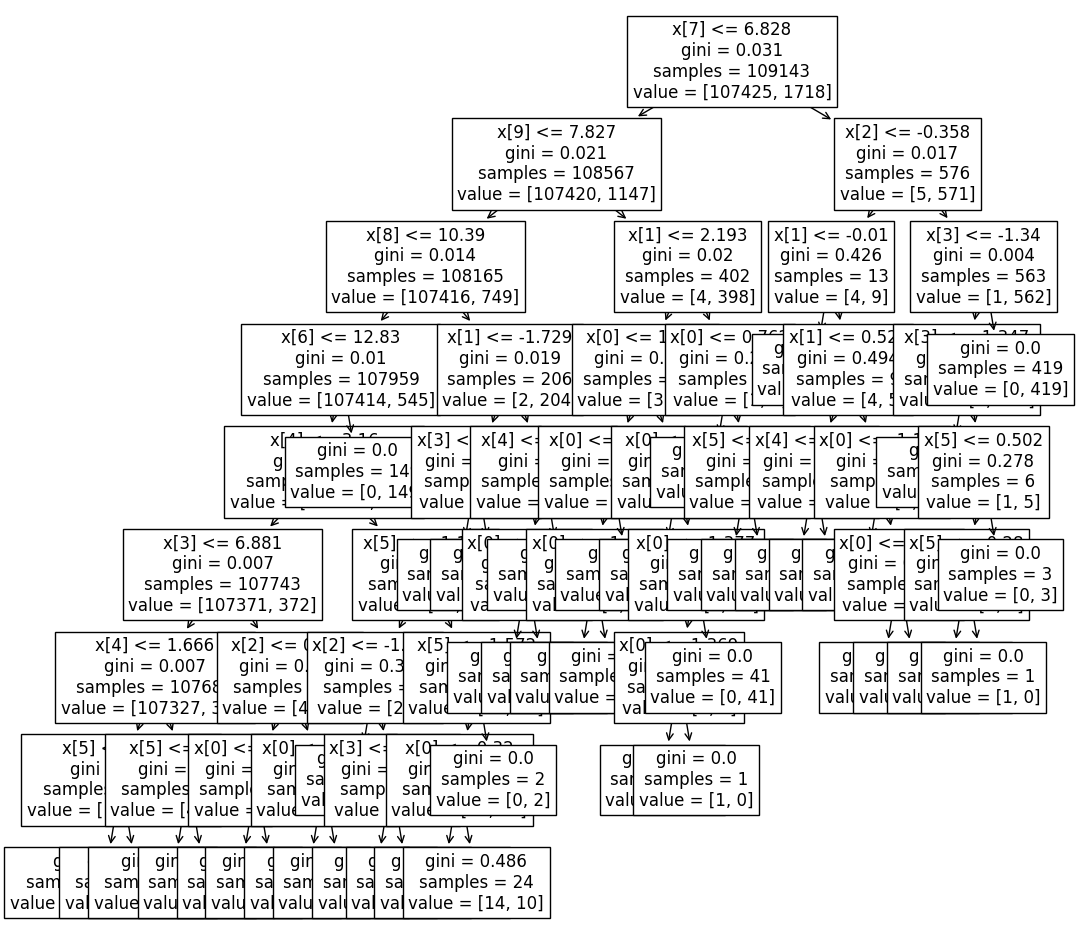

In [129]:
plt.figure(figsize=(12,12))
tree.plot_tree(DTC,fontsize=(12))
plt.show()

## **d) Support Vector Classification (SVR)**

In [130]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from scipy import stats
from sklearn.datasets import make_blobs

In [131]:
model= SVC()
model.fit(x_train_sc,y_train)

SVC()

In [ ]:
prediction_SVC = model.predict(x_train_sc)
print("Accuracy of model SVC: ",accuracy_score(y_train,prediction_SVC))
print("Roc Auc Score SVC: ",roc_auc_score(y_train,prediction_SVC))
print("Classification Report: ",classification_report(y_train,prediction_SVC))

In [ ]:
prediction_SVC = model.predict(x_test_sc)
print("Accuracy of model SVC: ",accuracy_score(y_test,prediction_SVC))
print("Roc Auc Score SVC: ",roc_auc_score(y_test,prediction_SVC))
print("Classification Report: ",classification_report(y_test,prediction_SVC))

# e) Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFC = RandomForestClassifier(max_depth=10, random_state=0)
RFC.fit(x_train_sc,y_train)

In [ ]:
prediction_RFC = RFC.predict(x_train_sc)
print("Accuracy of model RFC: ",accuracy_score(y_train,prediction_RFC))
print("Roc Auc Score RFC: ",roc_auc_score(y_train,prediction_RFC))

In [ ]:
prediction_RFC = RFC.predict(x_test_sc)
print("Accuracy of model RFC: ",accuracy_score(y_test,prediction_RFC))
print("Roc Auc Score RFC: ",roc_auc_score(y_test,prediction_RFC))

# f) Gradient Boosting Classification

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [132]:
GBC = GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,max_depth=6)
GBC.fit(x_train_sc,y_train)

GradientBoostingClassifier(max_depth=6)

In [ ]:
prediction_GBC = GBC.predict(x_train_sc)
print("Accuracy of model GBC: ",accuracy_score(y_train,prediction_GBC))
print("Roc Auc Score GBC: ",roc_auc_score(y_train,prediction_GBC))
print("Classification Report: ",classification_report(y_train,prediction_GBC))

In [ ]:
prediction_GBC = GBC.predict(x_test_sc)
print("Accuracy of model GBC: ",accuracy_score(y_test,prediction_GBC))
print("Roc Auc Score GBC: ",roc_auc_score(y_test,prediction_GBC))
print("Classification Report: ",classification_report(y_test,prediction_GBC))

# From Test Set

In [138]:
test=pd.read_csv('/content/test.csv')
test.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [139]:
test_id = test.id

In [140]:
# Converting all uppercases in to lowercases
test.columns=test.columns.str.lower()
cat_cols = [col for col in test.columns if test[col].dtypes=='object']
for columns in cat_cols:
       test[columns] = test[columns].str.lower()

In [141]:
test.head()

,id,product id,type,air temperature [k],process temperature [k],rotational speed [rpm],torque [nm],tool wear [min],twf,hdf,pwf,osf,rnf
0,136429,l50896,l,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,l53866,l,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,l50498,l,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,m21232,m,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,m19751,m,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [142]:
#For finding nulls in each columns
test.isnull().sum()

id                         0
product id                 0
type                       0
air temperature [k]        0
process temperature [k]    0
rotational speed [rpm]     0
torque [nm]                0
tool wear [min]            0
twf                        0
hdf                        0
pwf                        0
osf                        0
rnf                        0
dtype: int64

In [143]:
test=test.drop_duplicates()
test.shape

(90954, 13)

In [144]:
test

,id,product id,type,air temperature [k],process temperature [k],rotational speed [rpm],torque [nm],tool wear [min],twf,hdf,pwf,osf,rnf
0,136429,l50896,l,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,l53866,l,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,l50498,l,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,m21232,m,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,m19751,m,303.4,312.3,1515,41.3,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,227378,l51130,l,302.3,311.4,1484,40.4,15,0,0,0,0,0
90950,227379,l47783,l,297.9,309.8,1542,33.8,31,0,0,0,0,0
90951,227380,l48097,l,295.6,306.2,1501,41.4,187,0,0,0,0,0
90952,227381,l48969,l,298.1,307.8,1534,40.3,69,0,0,0,0,0


In [145]:
test = pd.get_dummies(test,columns= ["type"])

In [146]:
test = test.drop(["product id"],axis=1)

In [147]:
test

,id,air temperature [k],process temperature [k],rotational speed [rpm],torque [nm],tool wear [min],twf,hdf,pwf,osf,rnf,type_h,type_l,type_m
0,136429,302.3,311.5,1499,38.0,60,0,0,0,0,0,0,1,0
1,136430,301.7,311.0,1713,28.8,17,0,0,0,0,0,0,1,0
2,136431,301.3,310.4,1525,37.7,96,0,0,0,0,0,0,1,0
3,136432,300.1,309.6,1479,47.6,5,0,0,0,0,0,0,0,1
4,136433,303.4,312.3,1515,41.3,114,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,227378,302.3,311.4,1484,40.4,15,0,0,0,0,0,0,1,0
90950,227379,297.9,309.8,1542,33.8,31,0,0,0,0,0,0,1,0
90951,227380,295.6,306.2,1501,41.4,187,0,0,0,0,0,0,1,0
90952,227381,298.1,307.8,1534,40.3,69,0,0,0,0,0,0,1,0


In [148]:
test_sc = sc.transform(test)

In [149]:
prediction_GBC = GBC.predict(test_sc)

In [150]:
prediction_GBC

array([0, 0, 0, ..., 0, 0, 0])

In [151]:
submission = pd.DataFrame({"id":test_id,"Machine failure":prediction_GBC})

In [152]:
submission.head()

,id,Machine failure
0,136429,0
1,136430,0
2,136431,0
3,136432,0
4,136433,0


In [153]:
submission.to_csv('submission.csv',index=False) #index=false is to remove automatic index (0,1,2,....)

In [154]:
import pickle   #for saving model
pickle.dump(GBC,open("binary-classification-of-machine-failures.sav","wb") )